In [141]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(24,18)

from Functions_proj1_PM import *
from explore_functions import *
from scipy import stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from proj1_helpers import *
from os import path

In [8]:
basepath = path.dirname(path.realpath("Project1_Data_exploration.ipynb"))
data_path = path.abspath(path.join(basepath, "../all/",  "train.csv"))
#print(data_path)

yb, input_data, ids = load_csv_data(data_path, sub_sample=False)
print("yb has size ", yb.shape)
print("input data x has size ", input_data.shape)
print("The ids have size ", ids.shape)


C:\Users\maceira\switchdrive\My_documents\Courses\Machine Learning\GIT_ML_PM\ML_course\projects\project1\all\train.csv
yb has size  (250000,)
input data x has size  (250000, 30)
The ids have size  (250000,)


In [104]:
x = input_data
y = yb

df_x = pd.DataFrame(x)
df_y = pd.DataFrame({'outcome':y})
data = [df_y, df_x]
df = pd.concat(data, axis=1)
df_sample = df.sample(1000) 


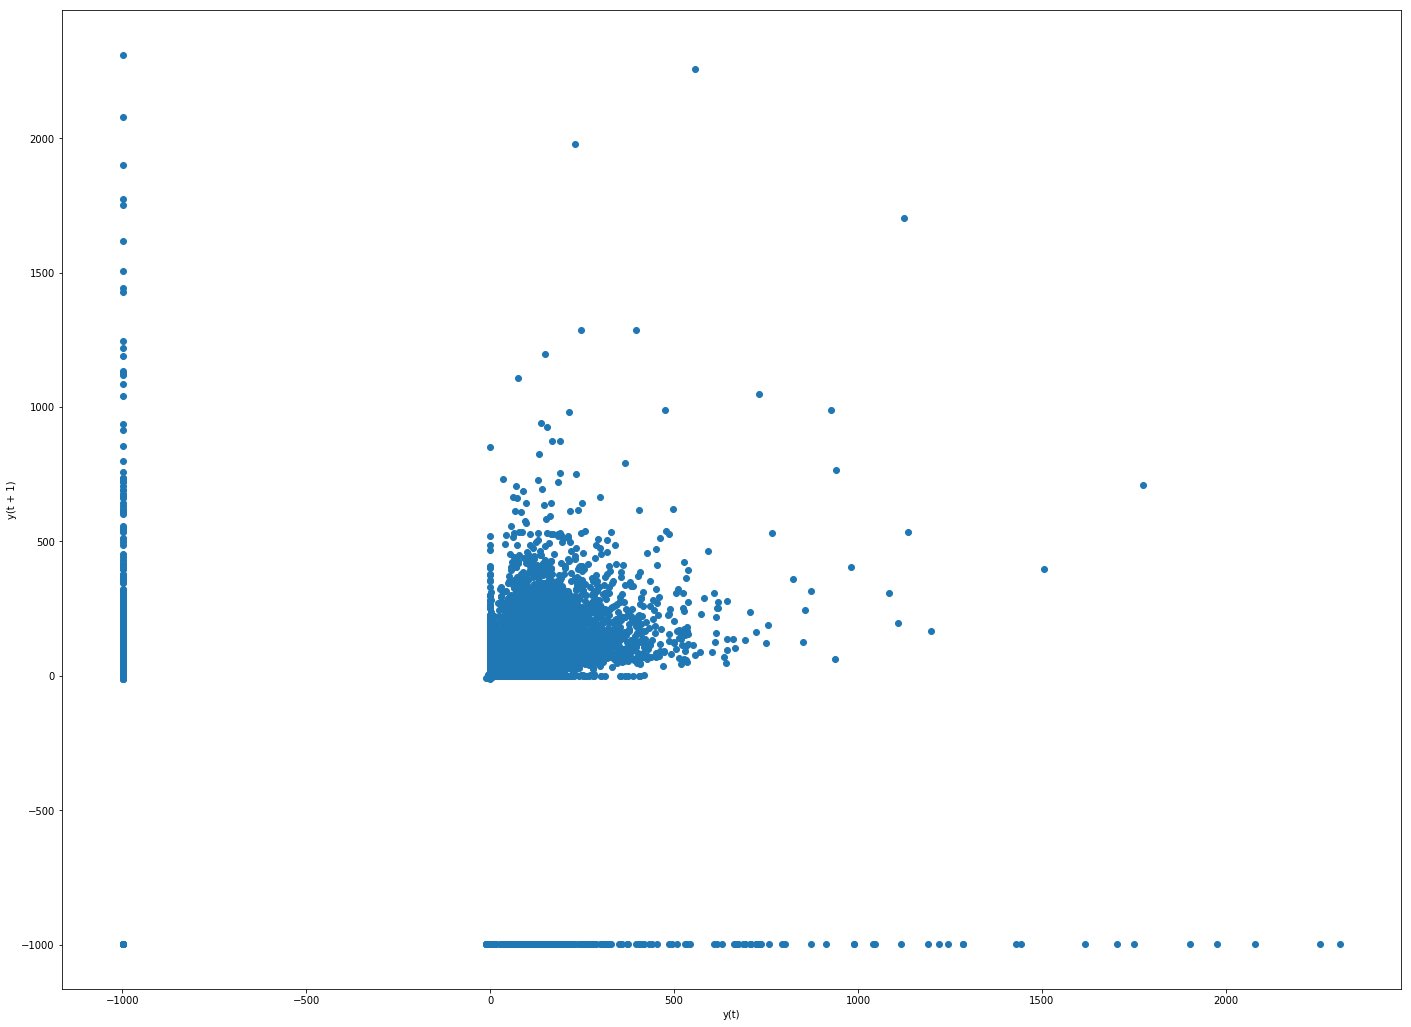

In [31]:
# Lag plot
fig=plt.figure()
pd.plotting.lag_plot(df_sample)
plt.savefig('lagplot_w_miss')

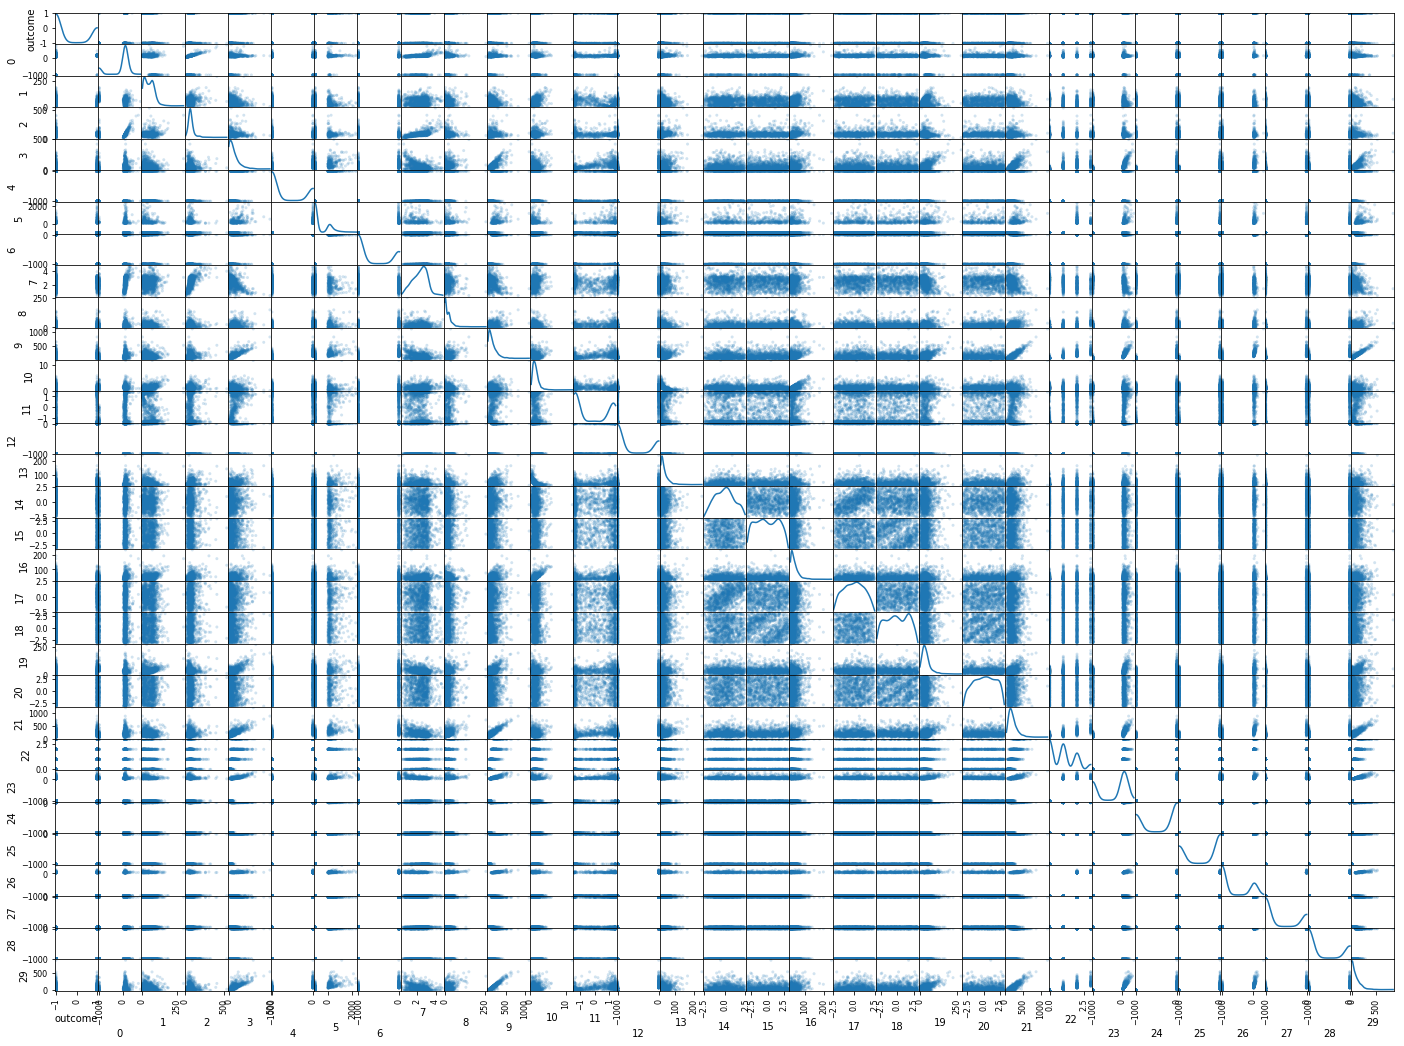

In [32]:
#Scatter matrix
fig=plt.figure()
pd.plotting.scatter_matrix(df_sample, alpha=0.2, diagonal='kde')
plt.savefig('matrixplot_w_miss.png')

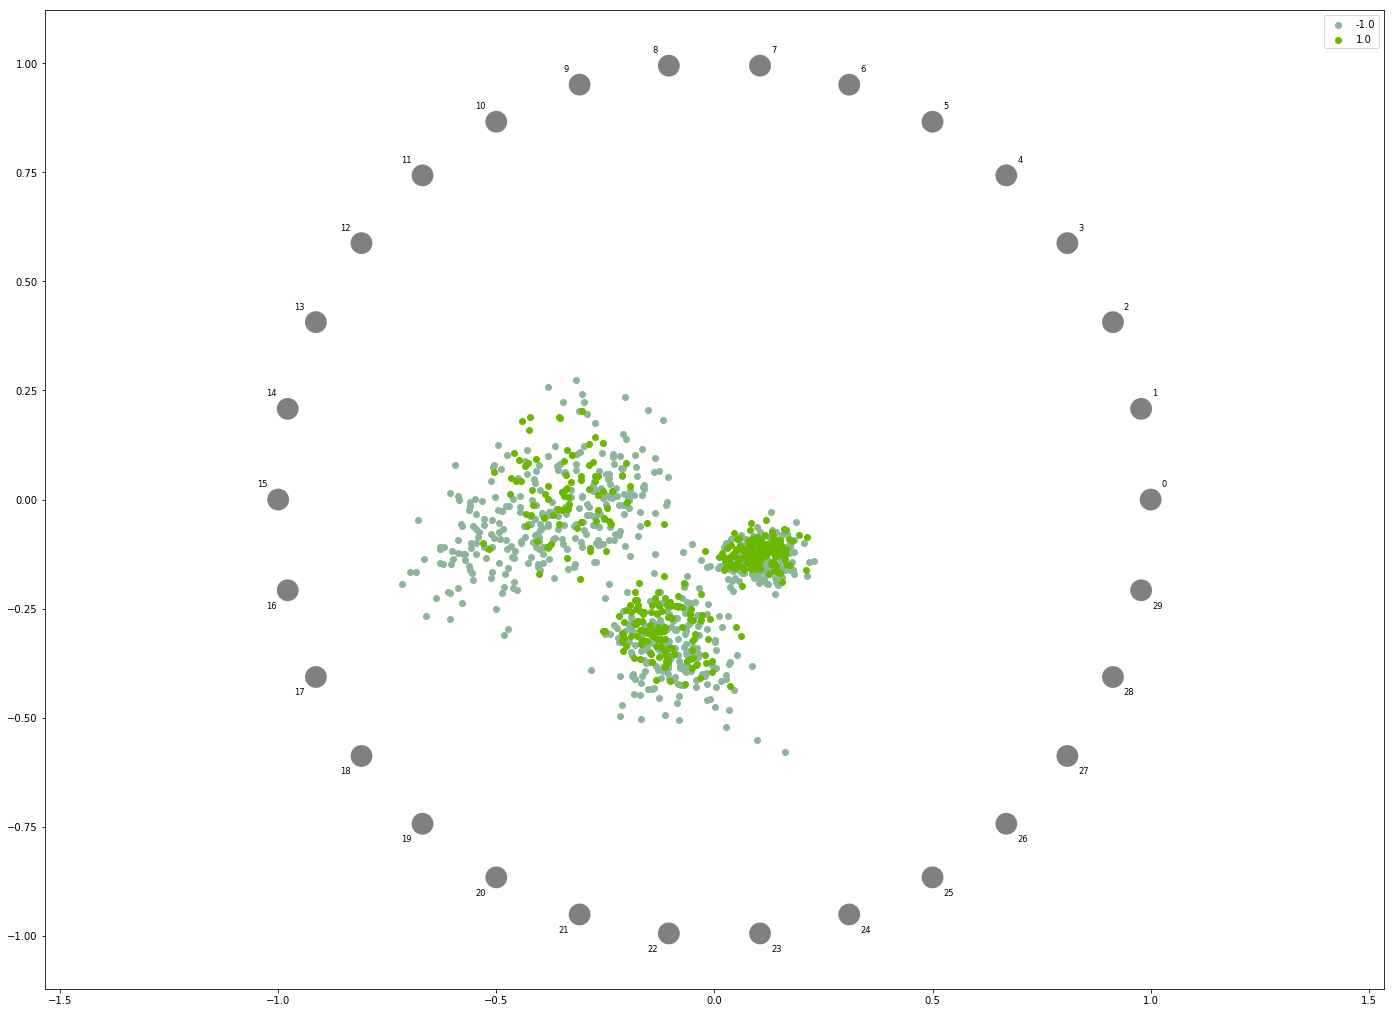

In [33]:
#RadViz
fig=plt.figure()
pd.plotting.radviz(df_sample, 'outcome')
plt.savefig('radviz_w_miss.png')

###### Explore impact of missing data

In [105]:
# Replace -999 by NaN
x = x
x[x == -999] = np.nan
num_nas = []
nas_frac = []
for c in range(0, 30):
    num_nas.append(np.count_nonzero(~np.isnan(x[:, c])))
    nas_frac.append(np.divide((x.shape[0] - num_nas[c]), x.shape[0]))
#print(num_nas)
#print(nas_frac)

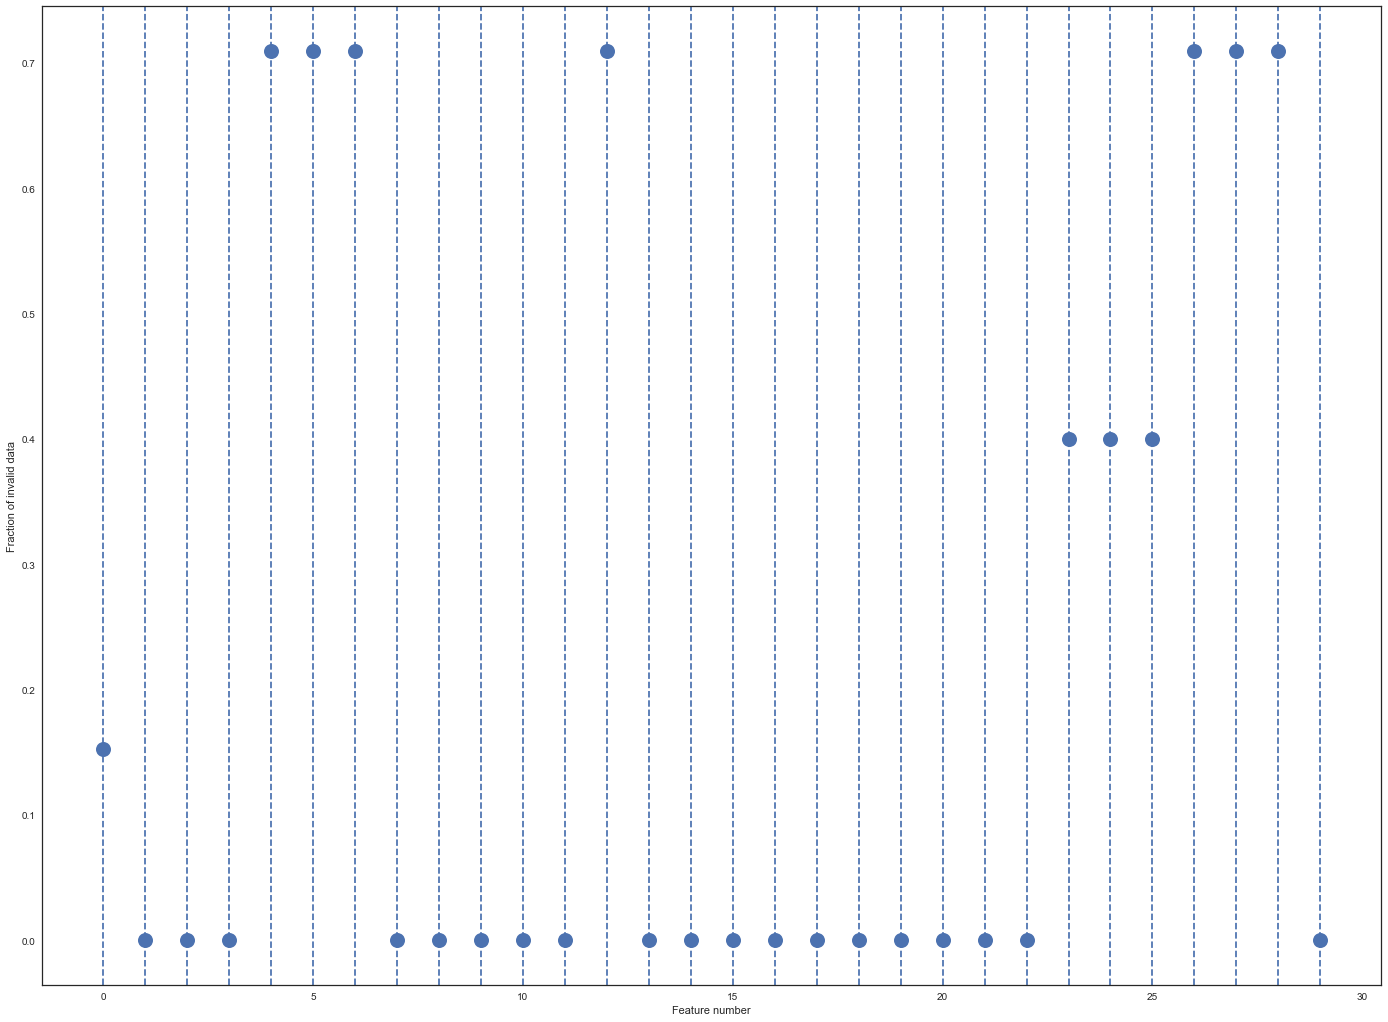

In [98]:
fig=plt.figure()
plt.plot(np.arange(30), nas_frac, '.', markersize=30)
for i in range(30):
    plt.axvline(i, linestyle='--')
plt.xlabel('Feature number')
plt.ylabel('Fraction of invalid data')
plt.savefig('missing_frac.png')

In [106]:
# Replace missing data with the mean from each class
x_clean, x_ones, x_zeros = replace_nans(x, y)

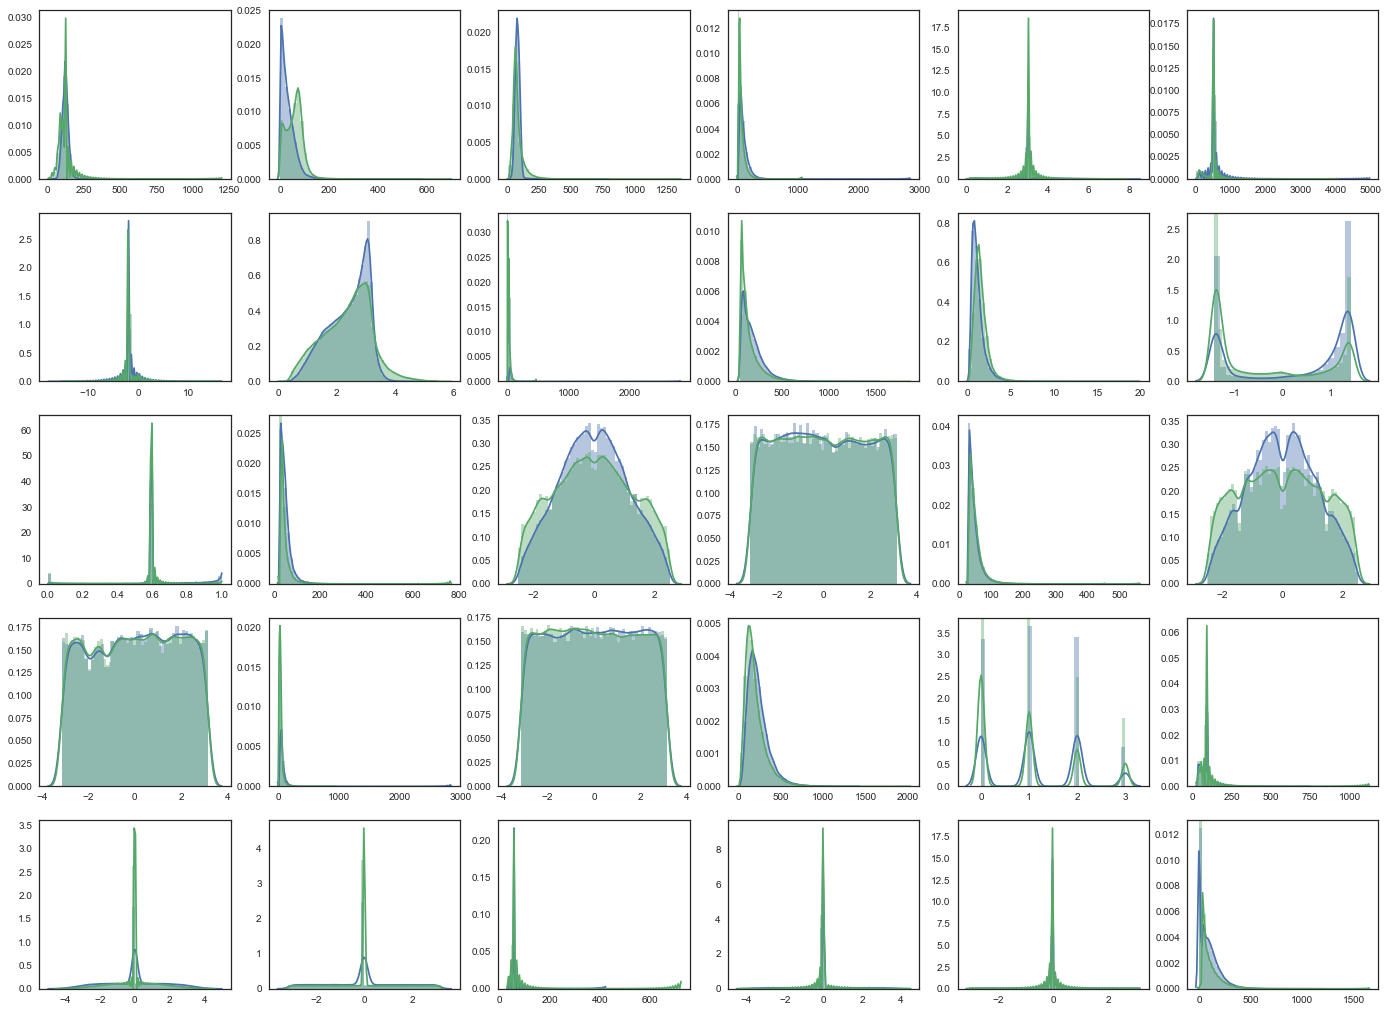

In [107]:
# Compare data distributions between classes
fig=plt.figure()
#sns.distplot(x_ones[:,0])
#sns.distplot(x_zeros[:,0])

p_values = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones[:, i-1], x_zeros[:, i-1], equal_var=False, nan_policy='omit')
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones[:,i-1])
    sns.distplot(x_zeros[:,i-1])

plt.savefig('dist_comp.png')
#print(p_values)

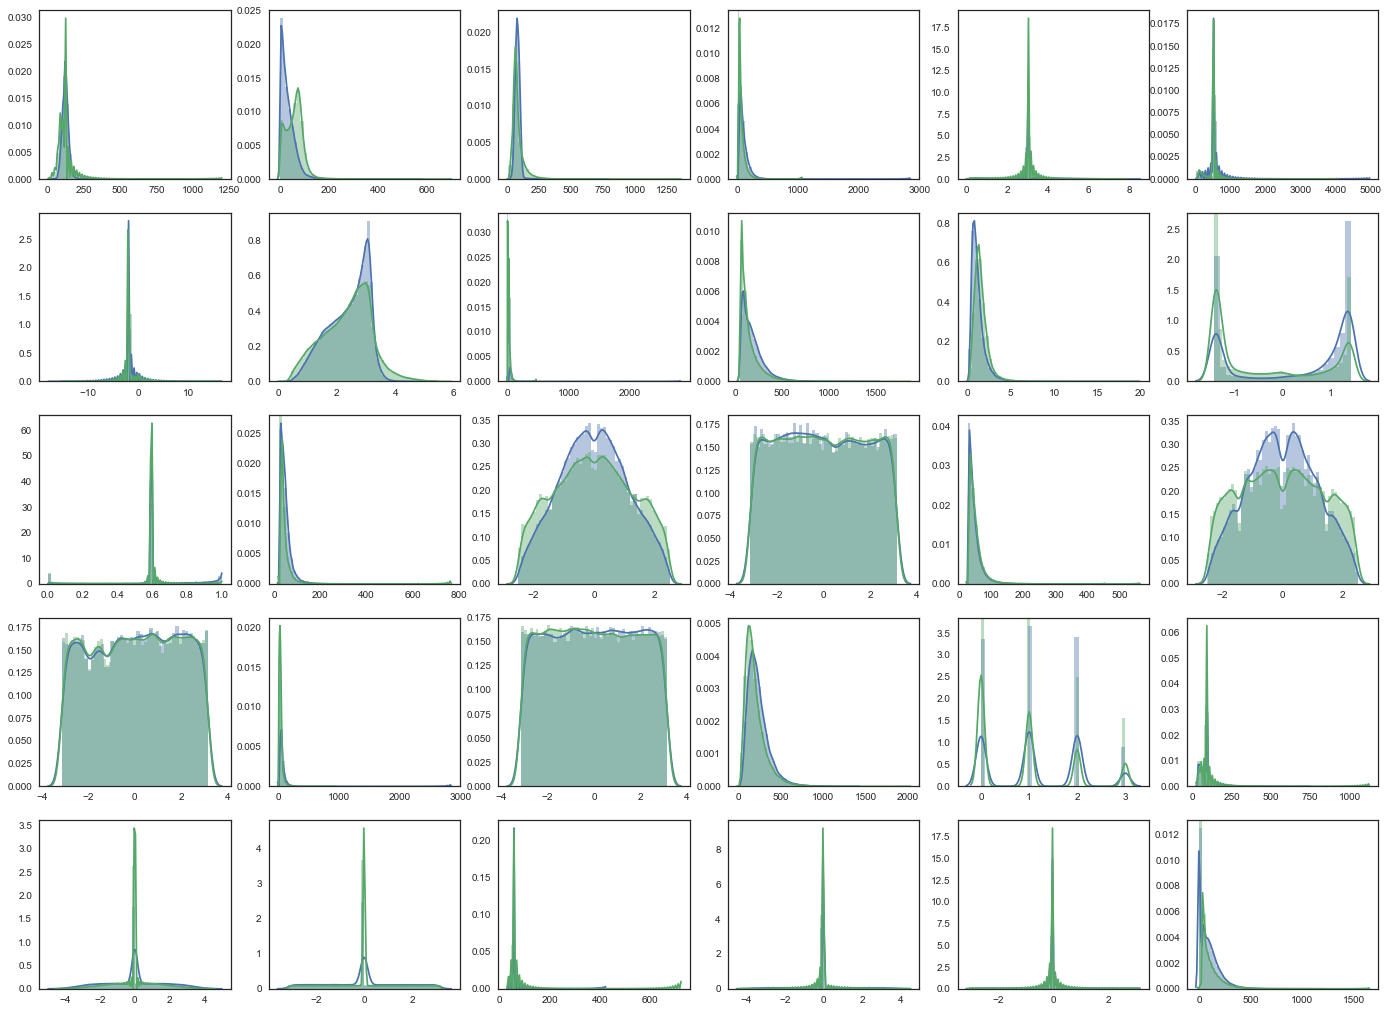

In [83]:
# Look at distributions of cleaned data
x_ones_clean = x_clean[y == 1., :]
x_zeros_clean = x_clean[y == -1., :]
fig=plt.figure()

p_values_clean = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_clean[:, i-1], x_zeros_clean[:, i-1], equal_var=False)
    p_values_clean.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_clean[:,i-1])
    sns.distplot(x_zeros_clean[:,i-1])

plt.savefig('clean_dist_comp.png')

In [114]:
# Standardize data (z-score)
x_z = zscore_std(x_clean)
print(np.std(x_z, axis=0))
print(np.mean(x_z, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-1.39934020e-12  4.49575133e-15 -3.48448848e-15  7.18646387e-15
  9.40199222e-13 -5.67385904e-12  3.62241501e-13  2.16223188e-14
  6.40057962e-15  2.86143687e-15 -6.98486646e-15  3.63458152e-15
 -7.99333620e-12 -5.95722149e-15  1.35646161e-16  7.13136217e-17
  2.58023760e-14 -1.06327391e-16 -1.87188487e-16  8.24115935e-15
  1.41040513e-16 -8.99509711e-15 -6.01698247e-16  3.82251714e-13
 -9.74683697e-15  1.07852701e-14 -4.57525434e-12  7.73677454e-15
  1.46694601e-14 -1.77122317e-15]


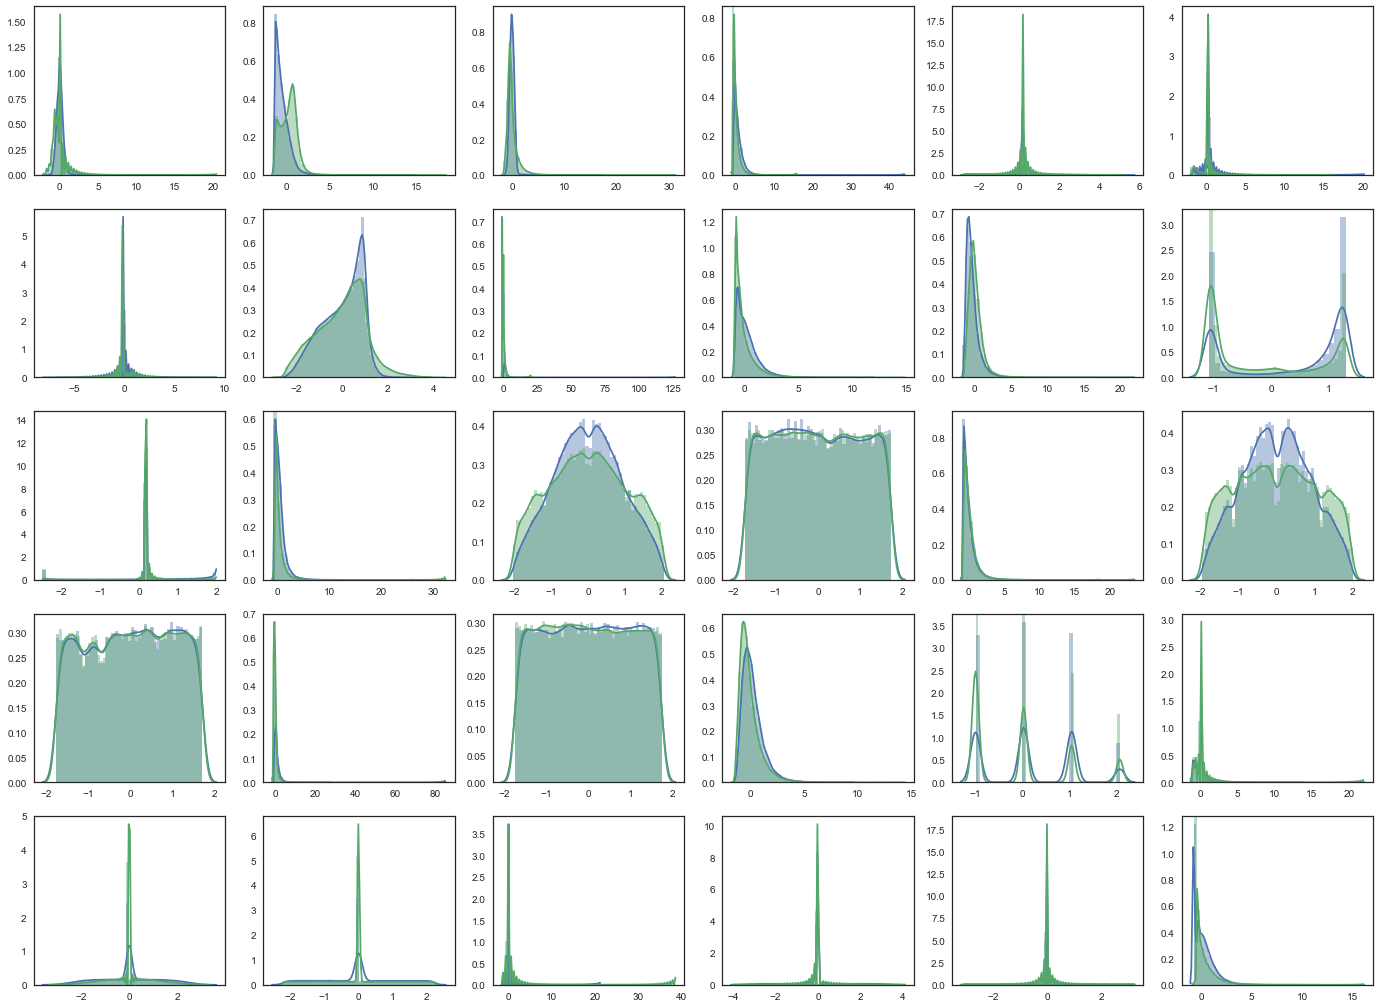

In [116]:
# Look at distributions of cleaned, standardized data
x_ones_z = x_z[y == 1., :]
x_zeros_z = x_z[y == -1., :]
fig=plt.figure()

p_values_std = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_z[:, i-1], x_zeros_z[:, i-1], equal_var=True)
    p_values_std.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_z[:,i-1])
    sns.distplot(x_zeros_z[:,i-1])

plt.savefig('std_dist_comp.png')


In [124]:
# Normalize data instead
x_norm = norm_x(x_clean)
print(x_norm.max(axis=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


[1.4484050481854694e-06, 0.0, 2.09591669467197e-12, 0.0, 0.0, 0.0, 0.0, 9.186453961213192e-10, 2.103762382319132e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6371957098658108, 0.02771698586147091, 1.8249750506964985e-57, 0.44838253952835283, 0.03913903242520138, 2.768744859021852e-29, 0.00018570793610250946, 0.0, 0.0, 4.798616300277532e-305, 0.9162294335770946, 0.9398329009994985, 1.0342615017287668e-06, 0.794539861524602, 0.17388751888057177, 0.0]


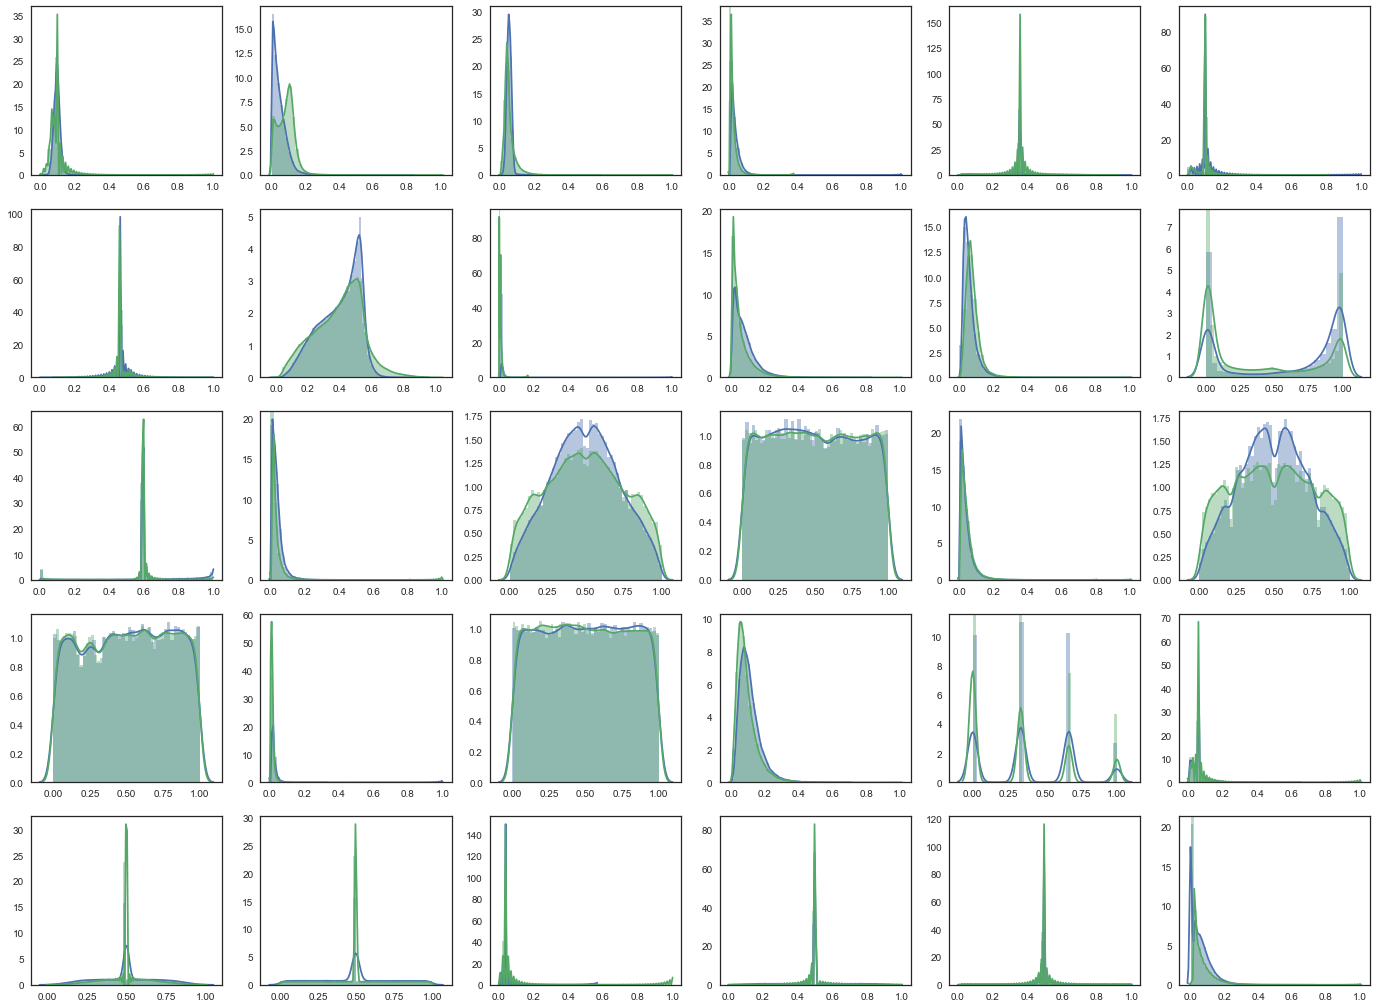

In [125]:
# Look at distributions of cleaned, normalized data
x_ones_norm = x_norm[y == 1., :]
x_zeros_norm = x_norm[y == -1., :]
fig=plt.figure()

p_values_norm = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_norm[:, i-1], x_zeros_norm[:, i-1], equal_var=True)
    p_values_norm.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_norm[:,i-1])
    sns.distplot(x_zeros_norm[:,i-1])

plt.savefig('norm_dist_comp.png')
print(p_values_norm)

In [126]:
# Look at cleaned data
df_x_clean = pd.DataFrame(x_clean)
df_y = pd.DataFrame({'outcome':y})
data = [df_y, df_x_clean]
df_clean = pd.concat(data, axis=1)
df_clean_sample = df_clean.sample(1000) 


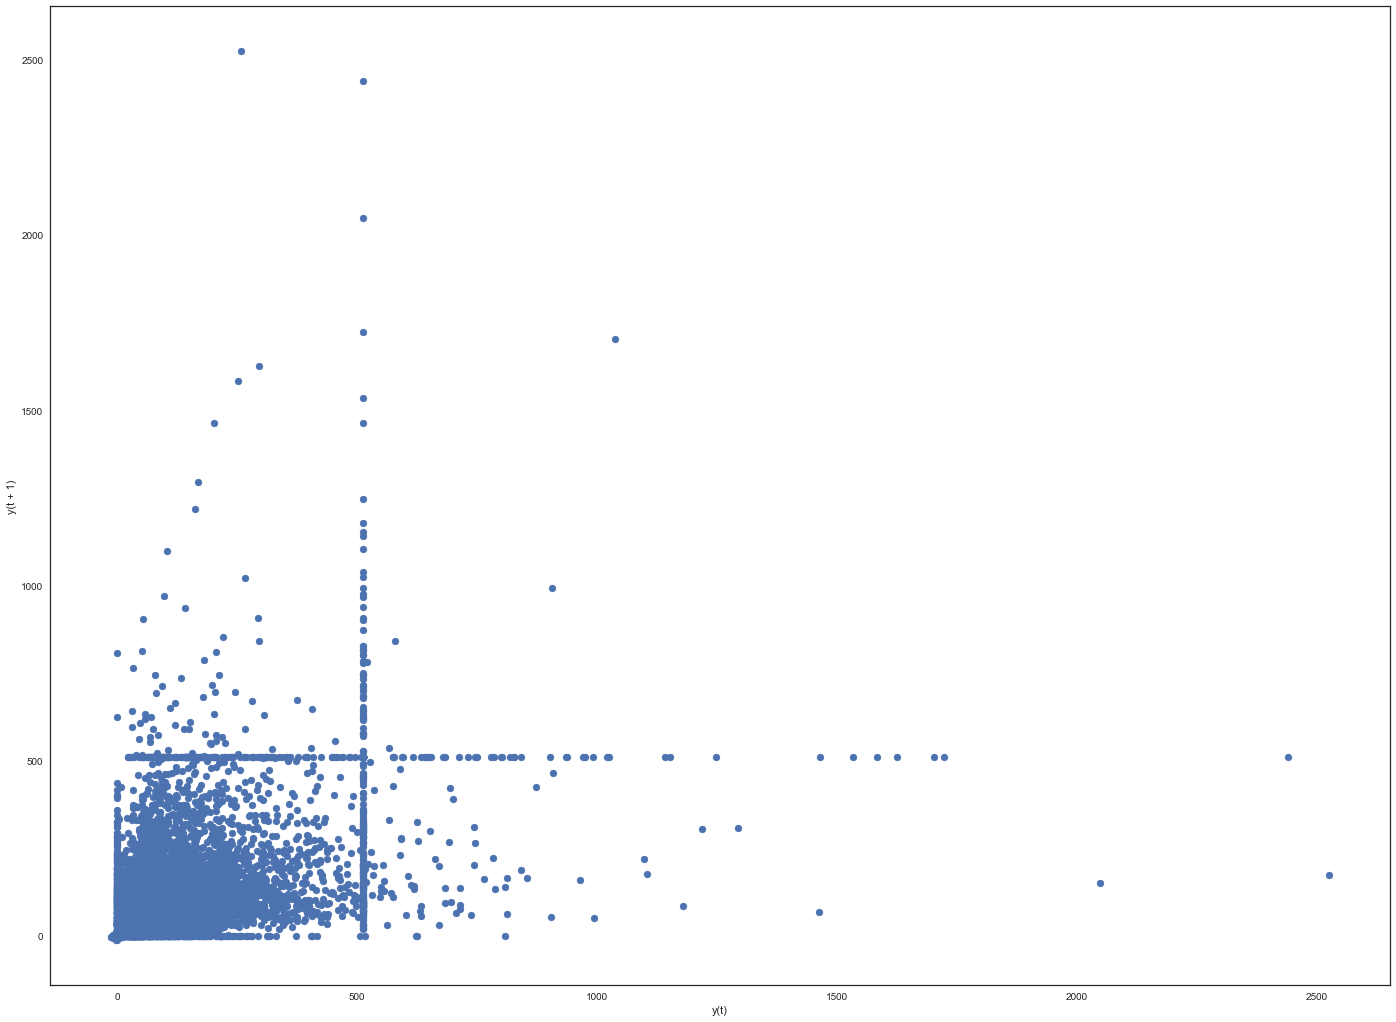

In [127]:
# Lag plot (cleaned data)
fig=plt.figure()
pd.plotting.lag_plot(df_clean_sample)
plt.savefig('lagplot_cleaned')

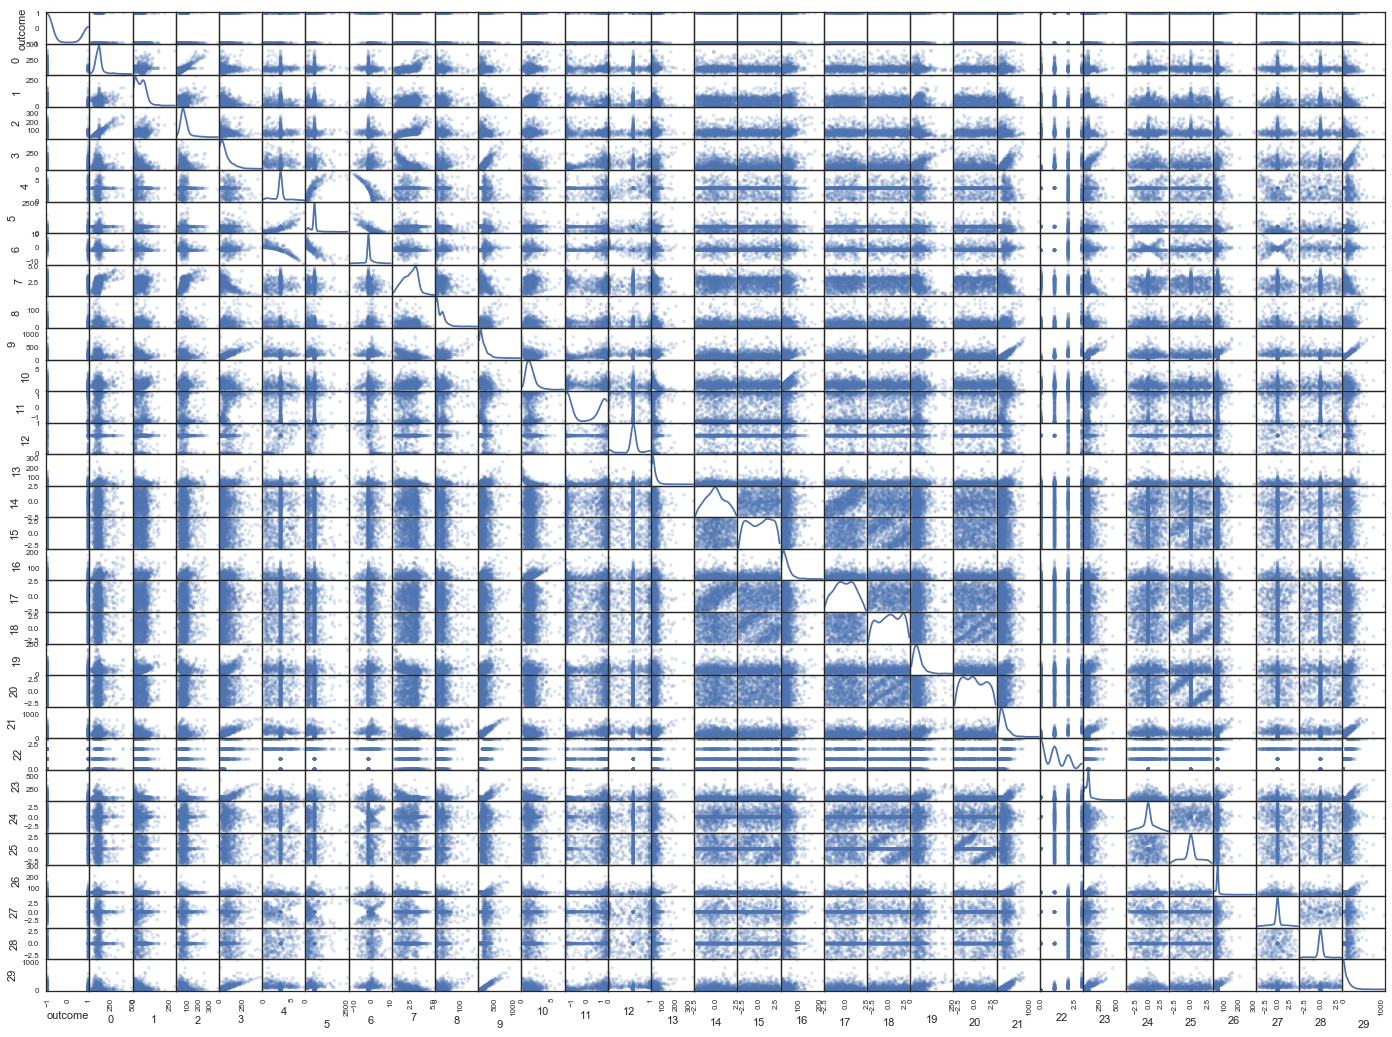

In [129]:
#Scatter matrix (cleaned data)
fig=plt.figure()
pd.plotting.scatter_matrix(df_clean_sample, alpha=0.2, diagonal='kde') # kde stands for kernel density estimation 
plt.savefig('matrixplot_cleaned.png')

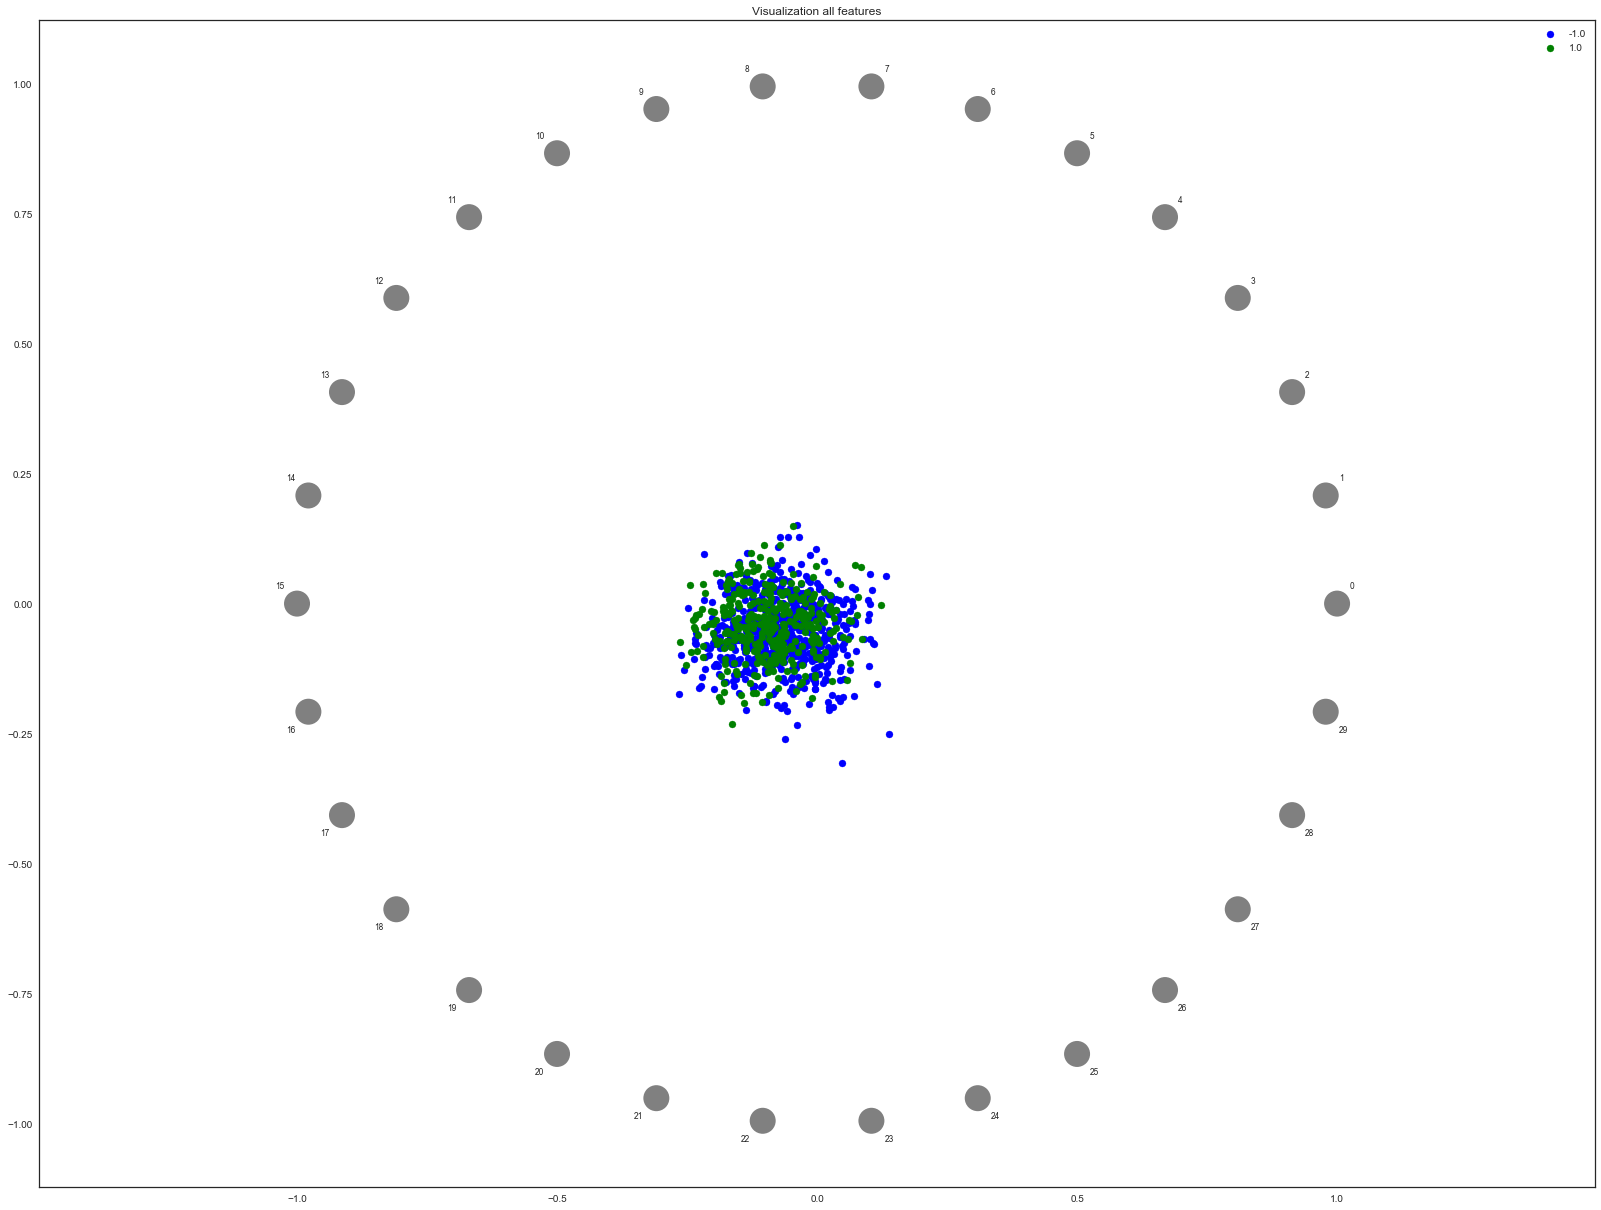

In [139]:
#RadViz (cleaned data)
fig=plt.figure()
ax = fig.add_axes( [.05, .05, .9, .9], title='Visualization all features')
pd.plotting.radviz(df_clean_sample, 'outcome', ax=ax, color=['blue', 'green'])
plt.savefig('radviz_cleaned.png')

In [152]:
# Transform data whenever skewed. Apply cubed transformation when moderately skewed to the left (< -0.5), 
# and log transformation when moderately skewed to the right (> 0.5)
# https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
x_transformed = transform_to_gauss(x_clean)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.6474134121555026e-110, 0.0, 9.186453961212157e-10, 7.761859913582294e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6371957098657793, 0.02771698586146296, 7.085163500230822e-101, 0.44838253952833673, 0.03913903242519572, 1.6141436920391638e-180, 0.00018570793610240958, 0.0, 0.0, 8.643252832143107e-192, 0.9162294335772305, 0.9398329009994665, 2.561594577544002e-97, 0.7945398615247381, 0.17388751888053183, 0.0]


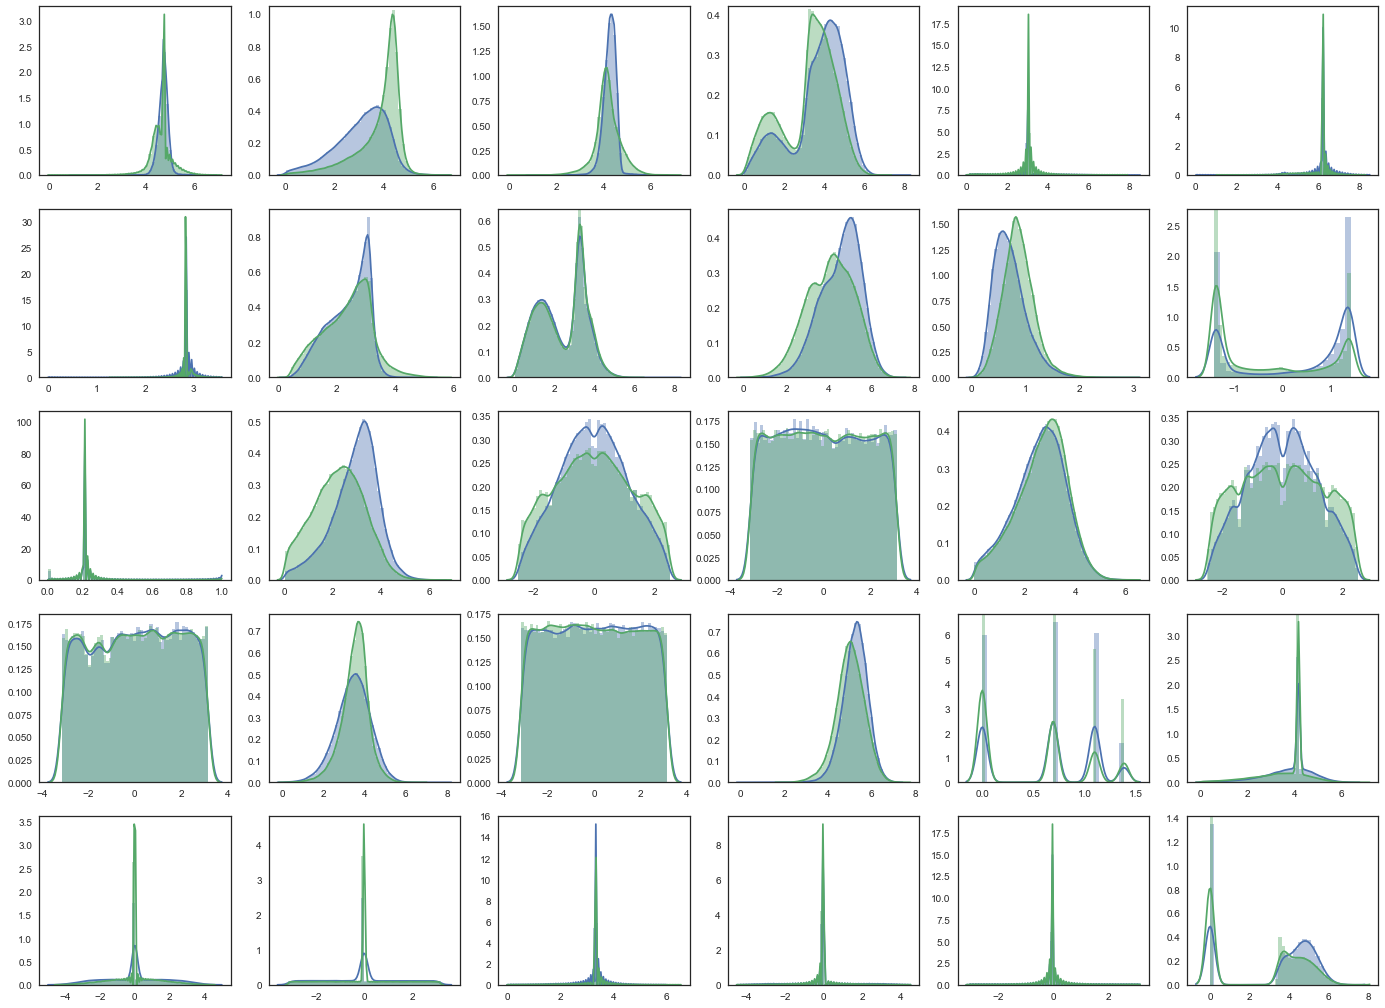

In [153]:
# Look at distributions of transformed data
x_ones_trans = x_transformed[y == 1., :]
x_zeros_trans = x_transformed[y == -1., :]
fig=plt.figure()

p_values_trans = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_trans[:, i-1], x_zeros_trans[:, i-1], equal_var=True)
    p_values_trans.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_trans[:,i-1])
    sns.distplot(x_zeros_trans[:,i-1])

plt.savefig('transformed_dist_comp.png')
print(p_values_trans)